# **2. ANN using PyTorch**
- ANN : Artificial Neural Network
####<br>
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 3분 딥러닝 파이토치맛

## 2-1. Tensor and Autograd

### 2-1-1. 텐서 다루기 기본: 차원(Rank)과 Shape

In [1]:
import torch

In [2]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [3]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [4]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [5]:
# 랭크의 형태 바꾸기
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [6]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


### 2-1-2. 텐서를 이용한 연산과 행렬곱

In [8]:
import torch

In [9]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.8406, -0.7064, -0.2168],
        [-1.0250,  0.1751,  0.6366],
        [-0.9863, -0.6857, -0.1216],
        [ 0.6998,  0.0674, -0.7768],
        [ 0.0337,  1.6213, -0.1286]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [10]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[ 0.4575, -0.3069],
        [-1.1853,  0.4918],
        [-0.0374,  1.6610],
        [-0.3905, -0.0645],
        [-2.7585,  0.1056]])


In [11]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-2.3625, -2.4451],
        [ 2.6837,  2.4705],
        [-3.6515, -5.4452],
        [-2.9820, -2.9915],
        [ 4.2544,  5.7807]])


In [12]:
result = wx + b	
print("result size:", result.size()) 
print("result:", result) 

result size: torch.Size([5, 2])
result: tensor([[-1.9050, -2.7519],
        [ 1.4984,  2.9623],
        [-3.6889, -3.7842],
        [-3.3725, -3.0560],
        [ 1.4959,  5.8863]])


### 2-1-3. 자동미분(Autograd)
- 사용법
  1. 계산하고자 하는 수식 생성
  2. 수식을 위한 requires_grad 값을 True로 설정. 파이토치의 Autograd 기능으로 자동 계산할 때 수식에 대한 미분값을 '수식.grad'에 저장
  3. backward() 함수를 사용하여 수식에 연쇄법칙을 적용하고 수식을 차례대로 미분


In [13]:
import torch

In [14]:
w = torch.tensor(1.0, requires_grad=True)

In [15]:
a = w*3
l = a**2
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


## 2-2. 경사하강법으로 이미지 복원하기
- 프로젝트 개요
  - 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌다. 
  - 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황이다. 
  - 다행히 weird_function()의 소스코드는 남아 있다. 
  - 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해보자.
####<br>
- 일반적인 접근 방법
  1. weird_function() 함수의 소스코드 분석
  2. 분석을 토대로 weird_function() 함수의 동작을 반대로 이행하는 함수 구현
  3. 2에서 구현한 함수에 오염된 이미지를 입력한 후, 복구된 이미지 출력
####<br>
- 머신러닝 방식의 접근 방법(사고 방법)
  1. 오염된 이미지와 같은 크기의 랜덤 텐서를 생성한다.
  2. 랜덤 텐서를 weird_function() 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.
    - (사실) 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.
    - (사실) 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.
  3. 가설과 오염된 이미지가 같다면 무작위 이미지와 원본 이미지도 같을 것이다.
  4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [18]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [19]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/data/'

In [16]:
import torch
import pickle
import matplotlib.pyplot as plt

In [21]:
shp_original_img = (100, 100)
filepath = '{}{}'.format(ROOT_PATH, 'broken_image_t.p')
broken_image =  torch.FloatTensor( pickle.load(open(filepath, 'rb'),encoding='latin1' ) )

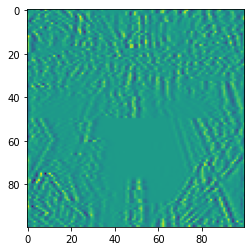

In [22]:
plt.imshow(broken_image.view(100,100)) 

In [23]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [24]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [25]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [26]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.08796501159668
Loss at 1000 = 1.1392771005630493
Loss at 2000 = 0.5317637324333191
Loss at 3000 = 0.36792460083961487
Loss at 4000 = 0.29188787937164307
Loss at 5000 = 0.24474751949310303
Loss at 6000 = 0.21035148203372955
Loss at 7000 = 0.18280194699764252
Loss at 8000 = 0.15939338505268097
Loss at 9000 = 0.1386779397726059
Loss at 10000 = 0.11980070918798447
Loss at 11000 = 0.1022244468331337
Loss at 12000 = 0.08559852838516235
Loss at 13000 = 0.06968698650598526
Loss at 14000 = 0.054326821118593216
Loss at 15000 = 0.03940422832965851
Loss at 16000 = 0.024839628487825394
Loss at 17000 = 0.021161310374736786
Loss at 18000 = 0.021166455000638962
Loss at 19000 = 0.02116743102669716


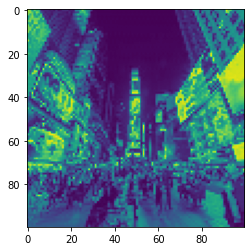

In [27]:
plt.imshow(random_tensor.view(100,100).data)

## 2-3. 신경망 모델 구현하기

In [28]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [29]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [30]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

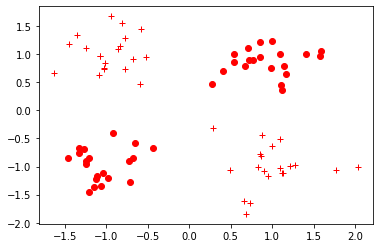

In [31]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [32]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [36]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [34]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [35]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6895025372505188


- 오차값이 0.73 이 나왔다. 
- 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방하다.
---
- 신경망을 학습시켜 성능 향상 시키기

In [37]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6980275511741638
Train loss at 100 is 0.6454440355300903
Train loss at 200 is 0.559746265411377
Train loss at 300 is 0.4361357092857361
Train loss at 400 is 0.3212893605232239
Train loss at 500 is 0.23008370399475098
Train loss at 600 is 0.16669759154319763
Train loss at 700 is 0.1249600201845169
Train loss at 800 is 0.09735219180583954
Train loss at 900 is 0.07849633693695068
Train loss at 1000 is 0.06511335074901581
Train loss at 1100 is 0.055264413356781006
Train loss at 1200 is 0.04778030142188072
Train loss at 1300 is 0.041942767798900604
Train loss at 1400 is 0.03729173541069031
Train loss at 1500 is 0.033515769988298416
Train loss at 1600 is 0.030391797423362732
Train loss at 1700 is 0.027769794687628746
Train loss at 1800 is 0.025541607290506363
Train loss at 1900 is 0.023626847192645073


In [38]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.013874483294785023


- 학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인할 수 있다.
---
- 학습된 모델을 .pt 파일로 저장하기

In [39]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.3046, -1.2628],
        [-0.4130, -0.1308],
        [-1.5958,  1.7051],
        [ 1.2735,  1.3564],
        [ 1.4721, -1.5684]])), ('linear_1.bias', tensor([-0.0234, -0.2447, -0.3513,  0.0616, -0.0419])), ('linear_2.weight', tensor([[-1.7885, -0.1584,  2.2192, -1.8547,  2.1012]])), ('linear_2.bias', tensor([-0.6132]))])


- `save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성된다. 
- 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능하다.

In [40]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9964093565940857
